
Adapted from this following tutorial.  For anyone reading this, I own several of his books and highly recommend them

https://machinelearningmastery.com/how-to-develop-a-word-level-neural-language-model-in-keras/

Andrej Karpathy's now famous blog post on RNNs:

http://karpathy.github.io/2015/05/21/rnn-effectiveness/



Text taken from Project Gutenberg (which is awesome and you should donate to this excellent community-run organization)

http://www.gutenberg.org/ebooks/100



In [30]:
import pandas as pd

import numpy as np

import string
import time

import matplotlib.pyplot as plt


In [5]:
#!dir

filename = 'hamlet2.txt'

# Number of sequences (e.g. if 50, use 50 words/tokens to predict a 51st word)
lenSequence = 50  

fid = open(filename, 'r')
text = fid.read()
fid.close()

In [6]:
print(text[0:500])

ï»¿THE TRAGEDY OF HAMLET, PRINCE OF DENMARK


by William Shakespeare



Dramatis Personae

  Claudius, King of Denmark.
  Marcellus, Officer.
  Hamlet, son to the former, and nephew to the present king.
  Polonius, Lord Chamberlain.
  Horatio, friend to Hamlet.
  Laertes, son to Polonius.
  Voltemand, courtier.
  Cornelius, courtier.
  Rosencrantz, courtier.
  Guildenstern, courtier.
  Osric, courtier.
  A Gentleman, courtier.
  A Priest.
  Marcellus, officer.
  Bernardo, officer.
  Francisco, a


In [7]:
print(text[1000:1500])

en] Bernardo, [who approaches him].

  Ber. Who's there.?
  Fran. Nay, answer me. Stand and unfold yourself.
  Ber. Long live the King!
  Fran. Bernardo?
  Ber. He.
  Fran. You come most carefully upon your hour.
  Ber. 'Tis now struck twelve. Get thee to bed, Francisco.
  Fran. For this relief much thanks. 'Tis bitter cold,
    And I am sick at heart.
  Ber. Have you had quiet guard?
  Fran. Not a mouse stirring.
  Ber. Well, good night.
    If you do meet Horatio and Marcellus,
    The rivals 


# Text cleaning

In [8]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def clean_text(text):
    tokens = text.split()
    
    table = str.maketrans('','', string.punctuation)
    tokens = [x.translate(table) for x in tokens]
    
    
    ## get rid of numeric characters, change all to lowercase
    tokens = [x.lower() for x in tokens if x.isalpha()] 
    return tokens
    
tokens = clean_text(text)

In [10]:
print(tokens[0:500])

['tragedy', 'of', 'hamlet', 'prince', 'of', 'denmark', 'by', 'william', 'shakespeare', 'dramatis', 'personae', 'claudius', 'king', 'of', 'denmark', 'marcellus', 'officer', 'hamlet', 'son', 'to', 'the', 'former', 'and', 'nephew', 'to', 'the', 'present', 'king', 'polonius', 'lord', 'chamberlain', 'horatio', 'friend', 'to', 'hamlet', 'laertes', 'son', 'to', 'polonius', 'voltemand', 'courtier', 'cornelius', 'courtier', 'rosencrantz', 'courtier', 'guildenstern', 'courtier', 'osric', 'courtier', 'a', 'gentleman', 'courtier', 'a', 'priest', 'marcellus', 'officer', 'bernardo', 'officer', 'francisco', 'a', 'soldier', 'reynaldo', 'servant', 'to', 'polonius', 'players', 'two', 'clowns', 'gravediggers', 'fortinbras', 'prince', 'of', 'norway', 'a', 'norwegian', 'captain', 'english', 'ambassadors', 'getrude', 'queen', 'of', 'denmark', 'mother', 'to', 'hamlet', 'ophelia', 'daughter', 'to', 'polonius', 'ghost', 'of', 'hamlets', 'father', 'lords', 'ladies', 'officers', 'soldiers', 'sailors', 'messenger

In [11]:
print(len(tokens))
print(len(set(tokens)))

31945
4788


In [12]:
sequences = []
for i in range(lenSequence, len(tokens)):
    subsequence = tokens[i-lenSequence:i]
    sequences.append(' '.join(subsequence))

In [13]:
print(len(sequences))
sequences[0:10]

31895


['tragedy of hamlet prince of denmark by william shakespeare dramatis personae claudius king of denmark marcellus officer hamlet son to the former and nephew to the present king polonius lord chamberlain horatio friend to hamlet laertes son to polonius voltemand courtier cornelius courtier rosencrantz courtier guildenstern courtier osric courtier a',
 'of hamlet prince of denmark by william shakespeare dramatis personae claudius king of denmark marcellus officer hamlet son to the former and nephew to the present king polonius lord chamberlain horatio friend to hamlet laertes son to polonius voltemand courtier cornelius courtier rosencrantz courtier guildenstern courtier osric courtier a gentleman',
 'hamlet prince of denmark by william shakespeare dramatis personae claudius king of denmark marcellus officer hamlet son to the former and nephew to the present king polonius lord chamberlain horatio friend to hamlet laertes son to polonius voltemand courtier cornelius courtier rosencrantz 

In [14]:
def save_clean_text(text, filename):
    fid = open(filename, 'w')
    fid.write('\n'.join(text))
    fid.close()

save_clean_text(sequences, 'hamlet_clean.txt')

# Data Processing part 2

Keras has a tokenizer to build a "word to integer" dictionary

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences)

In [17]:
sequences = tokenizer.texts_to_sequences(sequences)
len(tokenizer.word_index)

4788

In [18]:
num_vocabulary = len(tokenizer.word_index)+1  # array in keras goes from 1+, not like zero padding for python lists


Now we divide the data in to X and y, independent and dependent variables (a.k.a. standard Machine Learning)

The list is changed to numpy (standard for high performance python computing)

In [19]:
sequences = np.array(sequences)
sequences

array([[1254,    4,   48, ...,  530,  409,    6],
       [   4,   48,  752, ...,  409,    6,  253],
       [  48,  752,    4, ...,    6,  253,  409],
       ...,
       [4778,    2,   19, ..., 1934,   35,  629],
       [   2,   19,   15, ...,   35,  629,  209],
       [  19,   15, 1249, ...,  629,  209,    1]])

In [20]:
X = sequences[:,:-1]
X

array([[1254,    4,   48, ...,  409,  530,  409],
       [   4,   48,  752, ...,  530,  409,    6],
       [  48,  752,    4, ...,  409,    6,  253],
       ...,
       [4778,    2,   19, ...,    4, 1934,   35],
       [   2,   19,   15, ..., 1934,   35,  629],
       [  19,   15, 1249, ...,   35,  629,  209]])

In [21]:
y = sequences[:,-1]
y

array([  6, 253, 409, ..., 629, 209,   1])

In [22]:
# 1-hot encoding, Keras style
y = to_categorical(y, num_classes=num_vocabulary)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
sequence_length = X.shape[1]

# Fit model to data, train it

Preferably to the sound of this: 

https://www.youtube.com/watch?v=Jbp52Z9jRg0

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [25]:
def lstm_100node():
    lstm_model = Sequential()
    lstm_model.add(Embedding(num_vocabulary, lenSequence, input_length = sequence_length))
    lstm_model.add(LSTM(100, return_sequences=True))
    lstm_model.add(LSTM(100))
    lstm_model.add(Dense(100, activation='relu'))
    lstm_model.add(Dense(num_vocabulary, activation='softmax'))
    return lstm_model

#Similar to Andrej Karpathy's
def lstm_512node():
    lstm_model = Sequential()
    lstm_model.add(Embedding(num_vocabulary, lenSequence, input_length = sequence_length))
    lstm_model.add(LSTM(512, return_sequences=True))
    lstm_model.add(LSTM(512))
    lstm_model.add(Dense(512, activation='relu'))
    lstm_model.add(Dense(num_vocabulary, activation='softmax'))
    return lstm_model

lstm_model = lstm_512node()
print(lstm_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 49, 50)            239450    
_________________________________________________________________
lstm_1 (LSTM)                (None, 49, 100)           60400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 4789)              483689    
Total params: 874,039
Trainable params: 874,039
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
t = time.time()
history = lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Next line should be uncommented if you want to load weights from a previous run; obviously won't happen if it's the first time
#lstm_model.load_weights('hamlet.hd5')


history= lstm_model.fit(X,y, batch_size = 128, epochs = 100)

print('Elapsed time: ' + str(time.time() - t))

Epoch 1/100
31895/31895 [==============================] - 20s 631us/step - loss: 1.0769 - acc: 0.7234
Epoch 2/100
31895/31895 [==============================] - 19s 605us/step - loss: 0.9938 - acc: 0.7517
Epoch 3/100
31895/31895 [==============================] - 19s 594us/step - loss: 0.9996 - acc: 0.7487
Epoch 4/100
31895/31895 [==============================] - 19s 600us/step - loss: 0.9836 - acc: 0.7545
Epoch 5/100
31895/31895 [==============================] - 19s 602us/step - loss: 0.9711 - acc: 0.7567
Epoch 6/100
31895/31895 [==============================] - 19s 604us/step - loss: 0.9759 - acc: 0.7550
Epoch 7/100
31895/31895 [==============================] - 19s 596us/step - loss: 0.9672 - acc: 0.7579
Epoch 8/100
31895/31895 [==============================] - 20s 618us/step - loss: 0.9573 - acc: 0.7557
Epoch 9/100
31895/31895 [==============================] - 19s 608us/step - loss: 0.9355 - acc: 0.7641
Epoch 10/100
31895/31895 [==============================] - 19s 610us/ste

In [ ]:
#Layer (type)                 Output Shape              Param #   
#=================================================================
#embedding_3 (Embedding)      (None, 49, 50)            239450    
#_________________________________________________________________
#lstm_5 (LSTM)                (None, 49, 100)           60400     
#_________________________________________________________________
#lstm_6 (LSTM)                (None, 100)               80400     
#_________________________________________________________________
#dense_3 (Dense)              (None, 100)               10100     
#_________________________________________________________________
#dense_4 (Dense)              (None, 4789)              483689    
#=================================================================
#Total params: 874,039
#Trainable params: 874,039
#Non-trainable params: 0
#_________________________________________________________________
#None

#Epoch 100/100
#31895/31895 [==============================] - 21s 646us/step - loss: 2.2964 - acc: 0.4713



### after doing 3 runs (300 epochs total?)
#Epoch 99/100
#31895/31895 [==============================] - 20s 631us/step - loss: 0.4007 - acc: 0.8948
#Epoch 100/100
#31895/31895 [==============================] - 20s 632us/step - loss: 0.3667 - acc: 0.9094


In [79]:
from pickle import dump
lstm_model.save('hamlet.hd5')
dump(tokenizer, open('hamlet_tokenizer.pkl', 'wb'))

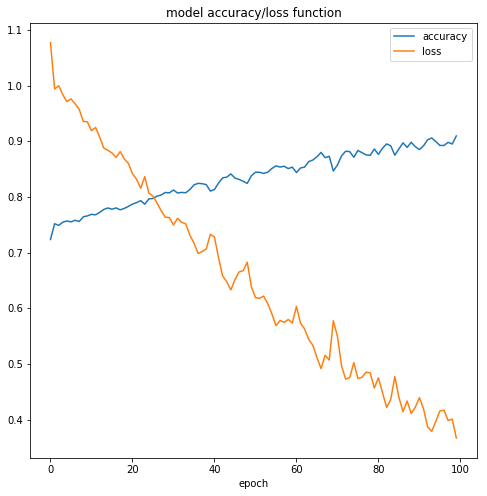

In [80]:
plt.figure(figsize=(8,8))
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy/loss function')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [ ]:
#yhat = lstm_model.predict_classes(sequences[1000])

In [53]:
f = open('hamlet_clean.txt', 'r')
text_for_seeding = f.read()
f.close()

In [54]:
text_for_seeding = text_for_seeding.split('\n') #[x.split('\n') for x in text_for_seeding]

In [55]:
text_for_seeding

['tragedy of hamlet prince of denmark by william shakespeare dramatis personae claudius king of denmark marcellus officer hamlet son to the former and nephew to the present king polonius lord chamberlain horatio friend to hamlet laertes son to polonius voltemand courtier cornelius courtier rosencrantz courtier guildenstern courtier osric courtier a',
 'of hamlet prince of denmark by william shakespeare dramatis personae claudius king of denmark marcellus officer hamlet son to the former and nephew to the present king polonius lord chamberlain horatio friend to hamlet laertes son to polonius voltemand courtier cornelius courtier rosencrantz courtier guildenstern courtier osric courtier a gentleman',
 'hamlet prince of denmark by william shakespeare dramatis personae claudius king of denmark marcellus officer hamlet son to the former and nephew to the present king polonius lord chamberlain horatio friend to hamlet laertes son to polonius voltemand courtier cornelius courtier rosencrantz 

In [46]:
num_input = len(text_for_seeding[0].split()) - 1
num_input

49

In [81]:
from keras_preprocessing.sequence import pad_sequences

fid = open('hamlet_clean.txt','r')
lines = fid.read()
fid.close()
lines = lines.split('\n')

def generate_text(lstm_model, tokenizer, num_input, input_text, numWords):
    result = []
    text = input_text
    for i in range(numWords):
        encoded = tokenizer.texts_to_sequences([text])[0]
        encoded = pad_sequences([encoded], maxlen = lenSequence, truncating='pre')
        
        encoded = encoded[:,:-1]
        
        y_hat = lstm_model.predict_classes(encoded, verbose=0)
        
        predicted_word = ''
        for word, index in tokenizer.word_index.items(): # Thought - is there a better way to do this?
            if index == y_hat:
                predicted_word = word
                break
        text += ' ' + predicted_word
        result.append(predicted_word)
    return ' '.join(result)

num_input = len(text_for_seeding[0].split()) - 1

line = text_for_seeding[np.random.randint(0, len(text_for_seeding))]
#line = line[:,-1]

generate_text(lstm_model, tokenizer, num_input-1, line, 49) 
    
def Capitalize(input):
    new = input.replace(' i', ' I')
    new = new.capitalize()
    return new
    
for i in range(10):
    line = lines[np.random.randint(0, len(lines))]
    result = generate_text(lstm_model, tokenizer, lenSequence-1, line, 55)
    
    result = Capitalize(result)
    
   #y_hat = lstm_model.predict_classes(line)
    print('\n')
    print(str(i) + '. ')
    print(result)
    
    
    #print(tokenizer.sequences_to_texts(list(line)))



0. 
He sleeps most for like my your fay enemy i tell two bird flashes to enter we the do scripture wrote a from guest no this relish sending of th be action and the springs beautified pol of dead thoughts let laer her ever sayst thus in to die our what songs figure it there


1. 
It an means but attends o a frighted whole of thousand to fortunes to flourish mine or two for head his exit clowns and lord kin at and love than speak his at peace never what are i that about put to tot the oph unweeded guil honourable and speech are been my to dying


2. 
Ghost and between whensoever me players my is good ghost ghost in beneath your laugh months farewell hor for you the are trifling ophelia and yet ever upon thou this bosom still motive was out them within takes of go my a pulse process that between loud me controversy to i direct speak here in


3. 
Visit him you ham shall sings this give words ye from round to from be a dry excellent up and my by compass kept of the hell soul in poor one

In [67]:
encoded = tokenizer.texts_to_sequences([text])[0]
encoded = pad_sequences([encoded], maxlen = lenSequence, truncating='pre')
encoded = encoded[:,:-1]

array([[  19,   15, 1249,    1,  488,    2,    1, 1930,    4, 1931,   82,
        4779,   19,   27,  134,  126,    1,  751,   94,    6,  444,   22,
          16, 1250,    1, 4781,   18,   97,  489,  106, 1932,   73,  628,
           1,  531, 4782,  131, 4783,  280,    1,   81,    6, 4788,    4,
        1934,   35,  629,  209,    1]])

In [48]:
line

'our watch so like the king that was and is the question of these wars hor a mote it is to trouble the minds eye in the most high and palmy state of rome a little ere the mightiest julius fell the graves stood tenantless and the sheeted dead did'